In [20]:
from windisch import *
import matplotlib.pyplot as plt

In [21]:
#update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
#tip.stochastic(3)
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={"year": [2020, ], "size": [1000,]}
)

In [22]:
wt = WindTurbineModel(
    array,
    location=(55.602164360115104, 12.491974627997108)
)

Downloaded 830.84 kB for location (55.602164360115104, 12.491974627997108)
Onshore wind turbines


In [23]:
wt.terrain_vars

<xarray.Dataset> Size: 526kB
Dimensions:      (group: 8760, size: 1, application: 2, year: 1, value: 1,
                  time: 8760)
Coordinates:
    XLAT         float32 4B 55.6
    XLON         float32 4B 12.47
    crs          int8 1B 0
    south_north  float64 8B 1.77e+05
    west_east    float64 8B -1.56e+05
  * group        (group) int64 70kB 0 1 2 3 4 5 ... 8755 8756 8757 8758 8759
  * time         (time) object 70kB 2000-01-01 00:00:00 ... 2000-12-30 23:00:00
  * size         (size) int64 8B 1000
  * application  (application) <U8 64B 'offshore' 'onshore'
    parameter    <U36 144B 'tower height'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0
Data variables:
    TKE          (group, size, application, year, value) float64 140kB 1.874 ...
    WS           (group, size, application, year, value) float64 140kB 8.914 ...
    RHO          (group) float32 35kB 1.242 1.242 1.242 ... 1.246 1.246 1.245
    LANDMASK     (group) float64 70kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes: (12/138)
    ADAPT_DT_MAX:                    15.0
    ADAPT_DT_MIN:                    3.0
    ADAPT_DT_START:                  13.0
    AER_ANGEXP_OPT:                  1
    AER_ANGEXP_VAL:                  1.2999999523162842
    AER_AOD550_OPT:                  1
    ...                              ...
    eastBoundLongitude:              12.491974627997108
    verticalExtentMinimum:           50.0
    verticalExtentMaximum:           150.0
    temporalExtentMinimum:           2017-01-01T00:30:00
    temporalExtentMaximum:           2018-12-31T23:30:00
    subset_pid:                      https://wps.neweuropeanwindatlas.eu/api/...

In [24]:
wt.set_all()

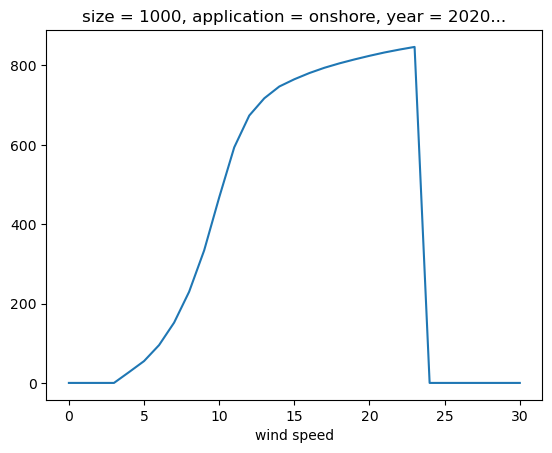

In [25]:
wt.power_curve.sel(application="onshore", year=2020).plot()

In [26]:
import pandas as pd
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:25832", "EPSG:4326", always_xy=True)

In [27]:
dk = pd.read_excel("/Users/romain/GitHub/windisch/dev/danish_wind_turbine_registry.xlsx", header=13)

In [28]:
dk = dk.iloc[:, [3, 12, 13, 55, 56, 57, 58, 59, 60, 61]]
dk.columns = [
    "Power (kW)",
    "X",
    "Y",
    "Production 2017",
    "Production 2018",
    "Production 2019",
    "Production 2020",
    "Production 2021",
    "Production 2022",
    "Production 2023"
]
dk["Production"] = dk[[
    "Production 2017",
    "Production 2018",
    "Production 2019",
    "Production 2020",
    "Production 2021",
    "Production 2022",
    "Production 2023"
]].mean(skipna=True, axis=1)
dk = dk.loc[dk["Production"] > 1e3]
dk = dk.loc[dk["X"] > 0]
dk = dk.loc[dk["Power (kW)"] > 500]
dk["Load factor"] = dk["Production 2023"] / (dk["Power (kW)"] * 8760)

In [30]:
dk = dk.sort_values(by="Power (kW)", ascending=False)

In [31]:
dk

,Power (kW),X,Y,Production 2017,Production 2018,Production 2019,Production 2020,Production 2021,Production 2022,Production 2023,Production,Load factor
5108,15000.0,492926.99,6325569.19,NaN,NaN,NaN,NaN,NaN,6.000000e+00,3.129594e+07,1.564797e+07,0.238173
5109,15000.0,492926.99,6323769.20,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.069166e+07,1.034583e+07,0.157471
5106,14000.0,492928.99,6323167.20,NaN,NaN,NaN,NaN,NaN,4.413073e+07,4.508336e+07,4.460705e+07,0.367607
5087,10000.0,492926.99,6322569.20,NaN,NaN,0.000,2.291887e+07,3.485599e+07,3.147918e+07,2.473467e+07,2.279774e+07,0.282359
5266,9525.0,469033.00,6145290.00,NaN,1.056714e+07,786640.600,NaN,NaN,NaN,NaN,5.676890e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
677,550.0,677830.67,6087156.56,1332692.109,1.082480e+06,1248161.548,1.190312e+06,1.028937e+06,1.104627e+06,1.008226e+06,1.142205e+06,0.209262
1302,525.0,476992.43,6331396.09,1020242.570,NaN,NaN,NaN,NaN,NaN,NaN,1.020243e+06,NaN
8518,525.0,477324.05,6331243.28,1012760.000,NaN,NaN,NaN,NaN,NaN,NaN,1.012760e+06,NaN
8519,525.0,477169.77,6331369.31,1012760.000,NaN,NaN,NaN,NaN,NaN,NaN,1.012760e+06,NaN


In [32]:
# Convert X, Y to Longitude (LON) and Latitude (LAT)
def convert_to_lat_lon(row):
    if pd.notnull(row['X']) and pd.notnull(row['Y']):
        lon, lat = transformer.transform(row['X'], row['Y'])
        return pd.Series([lon, lat])
    else:
        return pd.Series([None, None])

dk[['LAT', 'LON']] = dk.apply(convert_to_lat_lon, axis=1)

In [33]:
import numpy as np
def get_load_factor(row):
    tip = TurbinesInputParameters()
    tip.static()
    _, array = fill_xarray_from_input_parameters(
        tip,
        scope={"year": [2020, ],}
    )
    array = array.interp(size=[row["Power (kW)"]])
    wt = WindTurbineModel(
        array,
        location=(row["LON"], row["LAT"])
    )
    wt.set_all()
    return np.squeeze(np.nan_to_num(wt["average load factor"].values, 0)).max()


In [34]:
dk["Predicted load factor"] = None
dk.iloc[:200, -1] = dk.iloc[:200, :].apply(get_load_factor, axis=1)

Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (1/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (2/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (3/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (4/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (5/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (6/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (7/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=

/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (57.05728958950061, 8.883388501694306)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (57.051881618771674, 8.883438419656386)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (57.04650951559564, 8.883422281524895)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (55.45280520510544, 8.510371088004975)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (57.07345785344116, 8.883321464115278)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (57.07312556763144, 8.884009476173542)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Downloaded 830.84 kB for location (57.05698286296366, 8.88393368916837)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Onshore wind turbines
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (1/10)...
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (2/10)...
Downloaded 830.84 kB for location (55.01327859440665, 13.060155731445906)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.01742552070035, 12.987899907989208)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.02356506964554, 12.972072777617326)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.02703144908507, 13.054205113165256)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.03303962359087, 13.004015350678726)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.99454160079072, 13.043774375043196)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.98367102830226, 13.052579796204352)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.979716838069166, 13.025439744929772)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.087610631063434, 12.952446705027073)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.98553090881186, 13.014996085934264)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.09610662298213, 12.9566893803782)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.091614018980046, 12.970358281678065)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.08213670797267, 12.962849061528818)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.069526649087194, 12.95265181945381)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.08198268577012, 12.893273366589895)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.07627449082164, 12.868673035335)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.07327077258153, 12.886720920553696)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.05649371334685, 12.930214705909014)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.45404066900646, 8.50245977355802)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.98553058053322, 12.9964624904054)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.99276272983288, 13.005441741216147)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.99964530218833, 12.99936954478083)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.00897424085997, 12.99738848084067)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.988567104776315, 13.075597937048412)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.998582822592, 13.090695937267371)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.004027136393745, 13.04900183182751)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.01623540785143, 13.02263888016105)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.01025735975865, 13.104562912593016)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.01960525293102, 13.115381569848562)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.02643878040067, 13.10480996356187)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.03412546313417, 13.092912613770949)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.057772047230365, 13.014948186016916)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.058217515312094, 13.053020867765591)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.06509487278093, 13.0382491508015)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.07132247423753, 13.021855496272845)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.031513484068896, 12.951722090328502)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.04410277696113, 12.962830814406903)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.03748082092345, 12.942444475501743)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.04061179864942, 13.04423944053145)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.98416745506403, 12.81052054231555)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.989678047119135, 12.844842707589404)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.99462897341506, 12.76225561747941)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.99857100145241, 12.81607999122575)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.004530593926546, 12.756142856444047)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.00973554254177, 12.822821855464975)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.01327768265326, 12.761186865828835)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.019551741035855, 12.819531055698555)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.02296206457018, 12.76209480584399)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.032689910364084, 12.761598241898003)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.03344686602687, 12.815217763657754)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.042287230366526, 12.765317705037345)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.04483277106287, 12.813482303790144)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.05349717551826, 12.767780882739379)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.05604222931531, 12.817369149608686)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.984727078435725, 12.768365462683958)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.455675501715476, 8.494789847156815)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.971620996131456, 12.903711905718975)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.076983253994285, 12.922350672936561)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.06635613758388, 12.823993578427602)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.04185821296605, 13.07960588133096)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.04584576282659, 13.009508330746419)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.049542566533255, 13.067699144153393)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.053661338362936, 12.966470872215082)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.066096739504616, 12.98334261482476)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.079258392748955, 13.001583244940488)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.974811110182756, 12.775784395958919)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.0854141198897, 12.986676461708647)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.08760863517339, 12.91915868066664)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.09182021229723, 12.938012355081165)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.970246616718484, 12.868246909900511)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.971321250480386, 12.834644283854313)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.973098757068435, 12.803858371522507)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (54.97984691929022, 12.87206403286451)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.058579547456205, 12.787999567264636)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.106464199048375, 7.953466628081125)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.07564004329246, 7.953574454006114)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.08179571270262, 7.953553361849093)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.08797628388757, 7.953532298773891)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.0941070153763, 7.953511137740478)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.10026265748802, 7.953489989462129)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.11260939659422, 7.953427375633414)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.11873134895686, 7.953434408902853)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.12488518313917, 7.953405239902286)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.83 kB for location (56.137196400368, 7.95336275239728)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.13104079473613, 7.9533839975275065)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.069484376623386, 7.953595511086001)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.0633135234795, 7.953617137261937)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.05717301625384, 7.953637601324656)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.0510173312634, 7.953658602140602)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.04486164030092, 7.953679600268959)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.038705934110276, 7.95370056385833)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.03255023092989, 7.9537215245273325)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.02641209019048, 7.953741638317083)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (56.02022348527456, 7.953768600918085)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.66363689608817, 7.7243611445191585)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.655799358540825, 7.701934713042856)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.643664171637525, 7.710106098791352)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.706875567691526, 7.708597257491839)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.69694293524211, 7.709179358760515)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.737316063511315, 7.575647189255997)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.67315517298292, 7.719360510082139)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.728120181178745, 7.6012057809149685)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.6543090719016, 7.730418025970695)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.68427855204728, 7.742680911231624)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.67417871500881, 7.747139343214105)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.66465927699646, 7.75213338548937)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.68250893048322, 7.772941549586679)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.67904987379271, 7.687010302658375)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.66833360590168, 7.6941582935077175)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.682980311765675, 7.714506393744961)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.70150067973771, 7.683106859855637)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.670055504179395, 7.636001256083563)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.69941797852423, 7.62749996200328)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.71143297688159, 7.682502148472695)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.729170814510596, 7.6290359839539486)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.738978497328524, 7.6317822558643575)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.678685221809516, 7.604274814276844)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.6884839262953, 7.601428203754011)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.69837608868186, 7.599690618504241)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.708299062737005, 7.59908104416217)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.7182257402047, 7.599585387298488)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.736035456938815, 7.55067193837288)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.72575097758623, 7.553377753715934)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.71669032477995, 7.5615928511921116)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.70703243253463, 7.568727743080409)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.69731911097384, 7.571899095997834)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.6874273783904, 7.573643640536567)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.67973498837794, 7.63207001735043)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.70934993010149, 7.626881188314232)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.660531917855316, 7.641037860237212)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.69057835356876, 7.657018017304388)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.72135940879975, 7.6830276856882325)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.73125301638465, 7.68468523814456)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.7410595201956, 7.687445624489009)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.63435833376124, 7.690125769077312)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Error: HTTPSConnectionPool(host='wps.neweuropeanwindatlas.eu', port=443): Read timed out. (read timeout=25). Retrying (1/10)...
Downloaded 830.84 kB for location (55.6431677615122, 7.681998304392809)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.65225726706751, 7.674890729869016)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.67109806193542, 7.6637913051750255)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.66157313136281, 7.668805425273567)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.74002224431473, 7.6596211109858245)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.7302149759367, 7.656851861003414)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.720321201898024, 7.655217306740489)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (55.73792863105417, 7.603960915005622)


/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:589: RuntimeWarning: All-NaN slice encountered
  minval = np.nanmin(new_x_loaded)
/opt/homebrew/Caskroom/miniforge/base/envs/windisch/lib/python3.11/site-packages/xarray/core/missing.py:590: RuntimeWarning: All-NaN slice encountered
  maxval = np.nanmax(new_x_loaded)


Offshore wind turbines
Downloaded 830.84 kB for location (57.056958962044426, 8.884025264870193)
Onshore wind turbines
Downloaded 830.84 kB for location (55.45280520510544, 8.510371088004975)
Offshore wind turbines
Downloaded 830.84 kB for location (55.451929604605624, 8.518429780308034)
Onshore wind turbines
Downloaded 830.84 kB for location (57.06537282079246, 8.883346831433135)
Onshore wind turbines
Downloaded 830.84 kB for location (57.056958962044426, 8.884025264870193)
Onshore wind turbines
Downloaded 830.84 kB for location (57.05685721763989, 8.884065974337359)
Onshore wind turbines
Downloaded 830.84 kB for location (56.66483477449755, 8.241502510243556)
Offshore wind turbines
Downloaded 830.84 kB for location (56.67252475222875, 8.23406973640159)
Offshore wind turbines
Downloaded 830.84 kB for location (56.66925295088557, 8.256050600603366)
Offshore wind turbines
Downloaded 830.84 kB for location (56.677079439891585, 8.25175082545469)
Offshore wind turbines
Downloaded 830.84 kB

<Axes: >

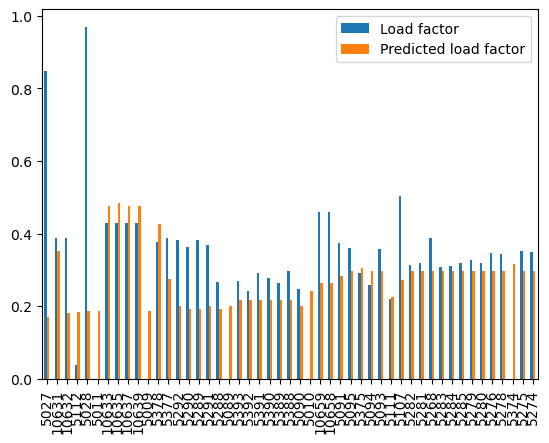

In [36]:
dk.loc[dk["Predicted load factor"] > 0, ["Load factor", "Predicted load factor"]].plot(kind="bar")

<Axes: xlabel='size,application'>

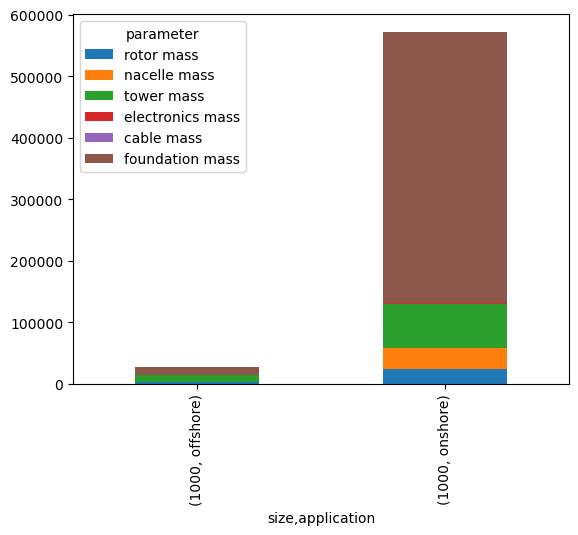

In [7]:
list_mass = [
    "rotor mass",
    "nacelle mass",
    "tower mass",
    "electronics mass",
    "cable mass",
    "foundation mass",
]
wt.array.sel(year=2020, value=0, parameter=list_mass).to_dataframe("val").unstack()["val"].plot(kind="bar", stacked=True)

In [24]:
wt.array.coords

Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * parameter    (parameter) <U36 'access road' ... 'turbines per farm'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0

In [22]:
wt.array.sel(year=2020, value=0, parameter="maintenance transport").to_dataframe("val").unstack()["val"]

application,offshore,onshore
size,,
1000kW,256779.661017,6250.0
100kW,0.000000,6250.0
3000kW,256779.661017,6250.0
500kW,0.000000,6250.0
8000kW,256779.661017,6250.0


<AxesSubplot: >

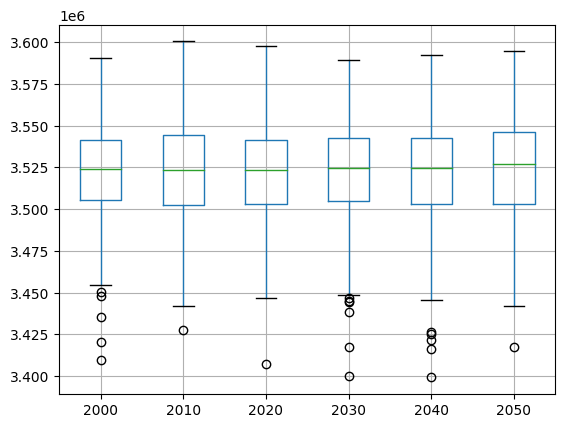

In [34]:
wt.array.sel(parameter="total mass", application="offshore", size="8000kW").to_dataframe("val").unstack()["val"].T.boxplot()

In [6]:
from windisch.model import func_tower_weight_d2h
func_tower_weight_d2h(5, 10, 3.03584782e-04, 9.68652909e00)

9762.425285500001

In [7]:
func_tower_weight_d2h(wt["rotor diameter"], wt["tower height"], 3.03584782e-04, 9.68652909e00)

<xarray.DataArray (size: 5, application: 2, year: 6, value: 1)>
array([[[[ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306],
         [ 73374.90009306]],

        [[ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994],
         [ 72712.91953994]]],


       [[[  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
         [  9686.52909   ],
...
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168],
         [ 30434.02672168]]],


       [[[840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929],
         [840467.97204929]],

        [[754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841],
         [754455.95551841]]]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
  * year         (year) int64 2000 2010 2020 2030 2040 2050
  * value        (value) int64 0
    tower mass   (size, application, year, value) float64 7.337e+04 ... 7.545...

In [6]:
wt.array.sel(year=2020, value=0, parameter="tower mass")

<xarray.DataArray (size: 5, application: 2)>
array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])
Coordinates:
  * size         (size) <U6 '1000kW' '100kW' '3000kW' '500kW' '8000kW'
  * application  (application) <U8 'offshore' 'onshore'
    parameter    <U36 'tower mass'
    year         int64 2020
    value        int64 0